In [1]:
# Todd McCullough
# 2020
import re
import numpy as np
import pandas as pd
import cpl_main as cpl
import random

In [2]:
results = pd.read_csv(f'datasets/soccer-nn-train.csv')
print(results.head(2))

  game      team    p1    p2    p3    p4    p5    p6    p7    p8    p9  p9.1  \
0   I1  Forge FC  0.71  0.89  0.74  0.71  0.48  0.89  0.77  0.52  0.50  0.48   
1   I1  York9 FC  0.93  0.92  0.91  0.86  0.41  0.78  0.65  0.64  0.46  0.70   

    p10  p11  p12  p13  r  s  
0  0.42  0.0  0.0  0.0  2  1  
1  0.47  0.0  0.0  0.0  2  1  


In [3]:
print(results.shape)

(3883, 18)


In [4]:
def pump_it_up(db):
    df = db.copy()
    dc = df.copy()
    m = df['p1'].copy()
    n = df['p2'].copy()
    o = df['p3'].copy()
    p = df['p4'].copy()
    q = df['p5'].copy()
    r = df['p6'].copy()
    df['p1'] = dc.pop('p8')
    df['p2'] = dc.pop('p10')
    df['p3'] = dc.pop('p12')
    df['p4'] = dc.pop('p9')
    df['p5'] = dc.pop('p11')
    df['p6'] = dc.pop('p13')
    df['p7'] = m
    df['p8'] = n
    df['p9'] = o
    df['p10'] = p
    df['p11'] = q
    df['p12'] = r
    df['p13'] = dc.pop('p7')
    dc = df.copy()
    db = pd.concat([db,df])
    df = dc.copy()
    m = df['p13'].copy()
    n = df['p12'].copy()
    o = df['p11'].copy()
    p = df['p10'].copy()
    q = df['p9'].copy()
    r = df['p8'].copy()
    df['p13'] = dc.pop('p8')
    df['p12'] = dc.pop('p10')
    df['p11'] = dc.pop('p12')
    df['p10'] = dc.pop('p9')
    df['p9'] = dc.pop('p11')
    df['p8'] = dc.pop('p13')
    df['p7'] = m
    df['p6'] = n
    df['p5'] = o
    df['p4'] = p
    df['p3'] = q
    df['p2'] = r
    df['p1'] = dc.pop('p7')
    #dc = df.copy()
    db = pd.concat([db,df])
    db = cpl.index_reset(db)
    return db

In [5]:
#df = pump_it_up(results)
#print(df.shape)

In [6]:
db = results.copy()

In [7]:
print(db.shape)

(3883, 18)


In [8]:
db.pop('game')
db.pop('team')
y = db.pop('s')
db.pop('r')
X = db

In [9]:
#X['all'] = round(X.sum(axis = 1, skipna = True) / 13,2)

In [10]:
print(X.head(2))

     p1    p2    p3    p4    p5    p6    p7    p8    p9  p9.1   p10  p11  p12  \
0  0.71  0.89  0.74  0.71  0.48  0.89  0.77  0.52  0.50  0.48  0.42  0.0  0.0   
1  0.93  0.92  0.91  0.86  0.41  0.78  0.65  0.64  0.46  0.70  0.47  0.0  0.0   

   p13  
0  0.0  
1  0.0  


In [11]:
from math import sqrt
from sklearn.metrics import mean_squared_error

#importing libraries from sklearn
from sklearn import tree
#from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler#,Imputer
from sklearn import metrics
# import algorithm modules
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [12]:
print(tf.__version__)

2.1.0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
seed = 7

In [40]:
#Linear Regression Model
def linearRegression():
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

lr = linearRegression()

print('\nLinear Regression Model')
print('\nRMSE: ', sqrt(mean_squared_error(y_test,lr.predict(X_test))))
print('\nScore',round(lr.score(X_test, y_test)*100,2))

#DecisionTreeRegressor
def decisionTree():
    model = DecisionTreeRegressor(criterion='mse', splitter='random', max_depth=8, max_features='log2')
    model.fit(X_train, y_train)
    return model
dt = decisionTree()

print('\nDecision Tree Regression Model')
print('\nRMSE: ', sqrt(mean_squared_error(y_test, dt.predict(X_test))))
print('\nScore',round(dt.score(X_test, y_test)*100,2))

#Random Forest Regression
def forestRegression():
    model = RandomForestRegressor(n_estimators = 500, random_state = 42)
    model.fit(X_train, y_train)
    return model

rf = forestRegression()

print('\nRandom Forest Regression Model')
print('\nRMSE: ', sqrt(mean_squared_error(y_test,rf.predict(X_test))))
print('\nScore',round(rf.score(X_test, y_test)*100,2))

from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators=[('lr', lr), ('dt', dt), ('rf', rf)])
vr = vr.fit(X_train, y_train)

print('\nVoting Regressor Model')
print('\nRMSE: ', sqrt(mean_squared_error(y_test,vr.predict(X_test))))
print('\nScore',round(vr.score(X_test, y_test)*100,2))


Linear Regression Model

RMSE:  1.22284599419792

Score 1.72

Decision Tree Regression Model

RMSE:  1.2530288819180666

Score -3.19

Random Forest Regression Model

RMSE:  1.2241685812507441

Score 1.51

Voting Regressor Model

RMSE:  1.220778810855711

Score 2.05


In [41]:
def kerasSequential():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss = 'mse',
                optimizer = tf.keras.optimizers.RMSprop(0.1),
                metrics = ['mae', 'mse'])

    return model

In [42]:
ks = kerasSequential()
print(ks.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                960       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
trained_weight = ks.get_weights()[0]
trained_bias = ks.get_weights()[1]

EPOCHS = 450
history = ks.fit(X_train,
                 y_train,
                 epochs = EPOCHS,
                 batch_size = 128,
                 validation_split = 0.2,
                 verbose = 1)

hist = pd.DataFrame(history.history)
mse = hist['mse']
epochs = history.epoch

Train on 2174 samples, validate on 544 samples
Epoch 1/450
2174/2174 [==============================] - 1s 625us/sample - loss: 3103.4846 - mae: 14.4831 - mse: 3103.4851 - val_loss: 1.5962 - val_mae: 1.0061 - val_mse: 1.5962
Epoch 2/450
2174/2174 [==============================] - 0s 63us/sample - loss: 1.5693 - mae: 1.0037 - mse: 1.5693 - val_loss: 1.7614 - val_mae: 1.1044 - val_mse: 1.7614
Epoch 3/450
2174/2174 [==============================] - 0s 56us/sample - loss: 1.5765 - mae: 1.0071 - mse: 1.5765 - val_loss: 1.7787 - val_mae: 0.9651 - val_mse: 1.7787
Epoch 4/450
2174/2174 [==============================] - 0s 94us/sample - loss: 1.5750 - mae: 1.0080 - mse: 1.5750 - val_loss: 1.6101 - val_mae: 0.9969 - val_mse: 1.6101
Epoch 5/450
2174/2174 [==============================] - 0s 87us/sample - loss: 1.5982 - mae: 1.0088 - mse: 1.5982 - val_loss: 1.7806 - val_mae: 0.9626 - val_mse: 1.7806
Epoch 6/450
2174/2174 [==============================] - 0s 83us/sample - loss: 1.6020 - mae: 1

Epoch 49/450
2174/2174 [==============================] - 0s 35us/sample - loss: 1.5394 - mae: 1.0221 - mse: 1.5394 - val_loss: 1.6156 - val_mae: 1.0179 - val_mse: 1.6156
Epoch 50/450
2174/2174 [==============================] - 0s 43us/sample - loss: 1.5264 - mae: 1.0139 - mse: 1.5264 - val_loss: 1.6305 - val_mae: 1.0548 - val_mse: 1.6305
Epoch 51/450
2174/2174 [==============================] - 0s 41us/sample - loss: 1.5362 - mae: 1.0181 - mse: 1.5362 - val_loss: 1.6278 - val_mae: 1.0525 - val_mse: 1.6278
Epoch 52/450
2174/2174 [==============================] - 0s 42us/sample - loss: 1.5347 - mae: 1.0187 - mse: 1.5347 - val_loss: 1.6203 - val_mae: 1.0447 - val_mse: 1.6203
Epoch 53/450
2174/2174 [==============================] - 0s 45us/sample - loss: 1.5276 - mae: 1.0156 - mse: 1.5276 - val_loss: 1.6391 - val_mae: 1.0609 - val_mse: 1.6391
Epoch 54/450
2174/2174 [==============================] - 0s 45us/sample - loss: 1.5292 - mae: 1.0184 - mse: 1.5292 - val_loss: 1.6248 - val_mae:

Epoch 97/450
2174/2174 [==============================] - 0s 33us/sample - loss: 1.5338 - mae: 1.0149 - mse: 1.5338 - val_loss: 1.6313 - val_mae: 1.0554 - val_mse: 1.6313
Epoch 98/450
2174/2174 [==============================] - 0s 31us/sample - loss: 1.5250 - mae: 1.0169 - mse: 1.5250 - val_loss: 1.6136 - val_mae: 1.0283 - val_mse: 1.6136
Epoch 99/450
2174/2174 [==============================] - 0s 31us/sample - loss: 1.5306 - mae: 1.0189 - mse: 1.5306 - val_loss: 1.6135 - val_mae: 1.0274 - val_mse: 1.6135
Epoch 100/450
2174/2174 [==============================] - 0s 31us/sample - loss: 1.5340 - mae: 1.0150 - mse: 1.5340 - val_loss: 1.6327 - val_mae: 1.0565 - val_mse: 1.6327
Epoch 101/450
2174/2174 [==============================] - 0s 33us/sample - loss: 1.5262 - mae: 1.0164 - mse: 1.5262 - val_loss: 1.6135 - val_mae: 1.0269 - val_mse: 1.6135
Epoch 102/450
2174/2174 [==============================] - 0s 37us/sample - loss: 1.5286 - mae: 1.0143 - mse: 1.5286 - val_loss: 1.6320 - val_m

Epoch 145/450
2174/2174 [==============================] - 0s 50us/sample - loss: 1.5284 - mae: 1.0159 - mse: 1.5284 - val_loss: 1.6595 - val_mae: 1.0724 - val_mse: 1.6595
Epoch 146/450
2174/2174 [==============================] - 0s 42us/sample - loss: 1.5288 - mae: 1.0190 - mse: 1.5288 - val_loss: 1.6208 - val_mae: 1.0454 - val_mse: 1.6208
Epoch 147/450
2174/2174 [==============================] - 0s 36us/sample - loss: 1.5308 - mae: 1.0163 - mse: 1.5308 - val_loss: 1.6436 - val_mae: 1.0638 - val_mse: 1.6436
Epoch 148/450
2174/2174 [==============================] - 0s 34us/sample - loss: 1.5286 - mae: 1.0191 - mse: 1.5286 - val_loss: 1.6157 - val_mae: 1.0176 - val_mse: 1.6157
Epoch 149/450
2174/2174 [==============================] - 0s 48us/sample - loss: 1.5335 - mae: 1.0184 - mse: 1.5335 - val_loss: 1.6168 - val_mae: 1.0394 - val_mse: 1.6168
Epoch 150/450
2174/2174 [==============================] - 0s 36us/sample - loss: 1.5314 - mae: 1.0183 - mse: 1.5314 - val_loss: 1.6195 - va

2174/2174 [==============================] - 0s 50us/sample - loss: 1.5276 - mae: 1.0139 - mse: 1.5276 - val_loss: 1.6312 - val_mae: 1.0553 - val_mse: 1.6312
Epoch 193/450
2174/2174 [==============================] - 0s 53us/sample - loss: 1.5285 - mae: 1.0176 - mse: 1.5285 - val_loss: 1.6137 - val_mae: 1.0245 - val_mse: 1.6137
Epoch 194/450
2174/2174 [==============================] - 0s 51us/sample - loss: 1.5276 - mae: 1.0157 - mse: 1.5276 - val_loss: 1.6142 - val_mae: 1.0222 - val_mse: 1.6142
Epoch 195/450
2174/2174 [==============================] - 0s 55us/sample - loss: 1.5326 - mae: 1.0157 - mse: 1.5326 - val_loss: 1.6181 - val_mae: 1.0416 - val_mse: 1.6181
Epoch 196/450
2174/2174 [==============================] - 0s 60us/sample - loss: 1.5323 - mae: 1.0175 - mse: 1.5323 - val_loss: 1.6314 - val_mae: 1.0555 - val_mse: 1.6314
Epoch 197/450
2174/2174 [==============================] - 0s 58us/sample - loss: 1.5308 - mae: 1.0196 - mse: 1.5308 - val_loss: 1.6137 - val_mae: 1.0300 

Epoch 240/450
2174/2174 [==============================] - 0s 54us/sample - loss: 1.5274 - mae: 1.0145 - mse: 1.5274 - val_loss: 1.6151 - val_mae: 1.0358 - val_mse: 1.6151
Epoch 241/450
2174/2174 [==============================] - 0s 48us/sample - loss: 1.5283 - mae: 1.0160 - mse: 1.5283 - val_loss: 1.6207 - val_mae: 1.0452 - val_mse: 1.6207
Epoch 242/450
2174/2174 [==============================] - 0s 53us/sample - loss: 1.5307 - mae: 1.0190 - mse: 1.5307 - val_loss: 1.6174 - val_mae: 1.0144 - val_mse: 1.6174
Epoch 243/450
2174/2174 [==============================] - 0s 47us/sample - loss: 1.5316 - mae: 1.0117 - mse: 1.5316 - val_loss: 1.6438 - val_mae: 1.0639 - val_mse: 1.6438
Epoch 244/450
2174/2174 [==============================] - 0s 52us/sample - loss: 1.5340 - mae: 1.0186 - mse: 1.5340 - val_loss: 1.6374 - val_mae: 1.0599 - val_mse: 1.6374
Epoch 245/450
2174/2174 [==============================] - 0s 49us/sample - loss: 1.5261 - mae: 1.0159 - mse: 1.5261 - val_loss: 1.6202 - va

2174/2174 [==============================] - 0s 56us/sample - loss: 1.5320 - mae: 1.0173 - mse: 1.5320 - val_loss: 1.6161 - val_mae: 1.0380 - val_mse: 1.6161
Epoch 288/450
2174/2174 [==============================] - 0s 51us/sample - loss: 1.5264 - mae: 1.0163 - mse: 1.5264 - val_loss: 1.6137 - val_mae: 1.0298 - val_mse: 1.6137
Epoch 289/450
2174/2174 [==============================] - 0s 50us/sample - loss: 1.5305 - mae: 1.0148 - mse: 1.5305 - val_loss: 1.6136 - val_mae: 1.0262 - val_mse: 1.6136
Epoch 290/450
2174/2174 [==============================] - 0s 47us/sample - loss: 1.5220 - mae: 1.0144 - mse: 1.5220 - val_loss: 1.6340 - val_mae: 0.9975 - val_mse: 1.6340
Epoch 291/450
2174/2174 [==============================] - 0s 60us/sample - loss: 1.5391 - mae: 1.0177 - mse: 1.5391 - val_loss: 1.6144 - val_mae: 1.0335 - val_mse: 1.6144
Epoch 292/450
2174/2174 [==============================] - 0s 55us/sample - loss: 1.5282 - mae: 1.0145 - mse: 1.5282 - val_loss: 1.6211 - val_mae: 1.0457 

Epoch 335/450
2174/2174 [==============================] - 0s 52us/sample - loss: 1.5261 - mae: 1.0143 - mse: 1.5261 - val_loss: 1.6140 - val_mae: 1.0320 - val_mse: 1.6140
Epoch 336/450
2174/2174 [==============================] - 0s 55us/sample - loss: 1.5325 - mae: 1.0172 - mse: 1.5325 - val_loss: 1.6169 - val_mae: 1.0396 - val_mse: 1.6169
Epoch 337/450
2174/2174 [==============================] - 0s 60us/sample - loss: 1.5330 - mae: 1.0183 - mse: 1.5330 - val_loss: 1.6164 - val_mae: 1.0162 - val_mse: 1.6164
Epoch 338/450
2174/2174 [==============================] - 0s 47us/sample - loss: 1.5290 - mae: 1.0153 - mse: 1.5290 - val_loss: 1.6175 - val_mae: 1.0407 - val_mse: 1.6175
Epoch 339/450
2174/2174 [==============================] - 0s 43us/sample - loss: 1.5343 - mae: 1.0206 - mse: 1.5343 - val_loss: 1.6170 - val_mae: 1.0151 - val_mse: 1.6170
Epoch 340/450
2174/2174 [==============================] - 0s 52us/sample - loss: 1.5305 - mae: 1.0143 - mse: 1.5305 - val_loss: 1.6191 - va

2174/2174 [==============================] - 0s 63us/sample - loss: 1.5291 - mae: 1.0157 - mse: 1.5291 - val_loss: 1.6156 - val_mae: 1.0180 - val_mse: 1.6156
Epoch 383/450
2174/2174 [==============================] - 0s 49us/sample - loss: 1.5268 - mae: 1.0137 - mse: 1.5268 - val_loss: 1.6136 - val_mae: 1.0283 - val_mse: 1.6136
Epoch 384/450
2174/2174 [==============================] - 0s 47us/sample - loss: 1.5293 - mae: 1.0160 - mse: 1.5293 - val_loss: 1.6172 - val_mae: 1.0147 - val_mse: 1.6172
Epoch 385/450
2174/2174 [==============================] - 0s 51us/sample - loss: 1.5341 - mae: 1.0162 - mse: 1.5341 - val_loss: 1.6143 - val_mae: 1.0333 - val_mse: 1.6143
Epoch 386/450
2174/2174 [==============================] - 0s 44us/sample - loss: 1.5292 - mae: 1.0183 - mse: 1.5292 - val_loss: 1.6164 - val_mae: 1.0162 - val_mse: 1.6164
Epoch 387/450
2174/2174 [==============================] - 0s 49us/sample - loss: 1.5295 - mae: 1.0152 - mse: 1.5295 - val_loss: 1.6136 - val_mae: 1.0284 

Epoch 430/450
2174/2174 [==============================] - 0s 59us/sample - loss: 1.5275 - mae: 1.0149 - mse: 1.5275 - val_loss: 1.6415 - val_mae: 1.0625 - val_mse: 1.6415
Epoch 431/450
2174/2174 [==============================] - 0s 45us/sample - loss: 1.5282 - mae: 1.0191 - mse: 1.5282 - val_loss: 1.6178 - val_mae: 1.0137 - val_mse: 1.6178
Epoch 432/450
2174/2174 [==============================] - 0s 63us/sample - loss: 1.5245 - mae: 1.0126 - mse: 1.5245 - val_loss: 1.6383 - val_mae: 1.0604 - val_mse: 1.6383
Epoch 433/450
2174/2174 [==============================] - 0s 54us/sample - loss: 1.5349 - mae: 1.0180 - mse: 1.5349 - val_loss: 1.6180 - val_mae: 1.0414 - val_mse: 1.6180
Epoch 434/450
2174/2174 [==============================] - 0s 58us/sample - loss: 1.5279 - mae: 1.0171 - mse: 1.5279 - val_loss: 1.6141 - val_mae: 1.0323 - val_mse: 1.6141
Epoch 435/450
2174/2174 [==============================] - 0s 47us/sample - loss: 1.5317 - mae: 1.0135 - mse: 1.5317 - val_loss: 1.6316 - va

In [44]:
from matplotlib import pyplot as plt
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""
    # Label the axes.
    plt.xlabel("feature")
    plt.ylabel("label")
    # Plot the feature values vs. label values.
    plt.scatter(feature, label)
    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    plt.plot(feature.tolist(), label.tolist(), c='r')
    # Render the scatter plot and the red line.
    plt.show()

def plot_the_loss_curve(epochs, mse):
    """Plot the loss curve, which shows loss vs. epoch."""
    plt.figure()
    plt.xlabel('epochs')
    plt.ylabel('mse')
    plt.plot(epochs, mse, label="Loss")
    plt.legend()
    plt.ylim([mse.min()*0.97, mse.max()])
    plt.show()

In [45]:
#feature = X['all'].copy()
#label = y.copy()

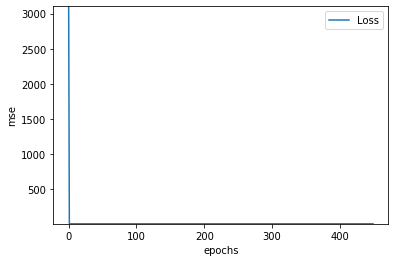

In [46]:
#plot_the_model(trained_weight, trained_bias, feature, label)
plot_the_loss_curve(epochs, mse)

In [47]:
print(hist.describe())

              loss         mae          mse    val_loss     val_mae  \
count   450.000000  450.000000   450.000000  450.000000  450.000000   
mean      8.425681    1.046465     8.425682    1.624766    1.037834   
std     146.227425    0.634833   146.227451    0.028591    0.018260   
min       1.520986    1.003658     1.520986    1.596156    0.962612   
25%       1.527757    1.014935     1.527757    1.614285    1.026873   
50%       1.529939    1.016399     1.529939    1.617700    1.036768   
75%       1.532608    1.017893     1.532608    1.627898    1.051100   
max    3103.484555   14.483106  3103.485107    2.101643    1.104442   

          val_mse  
count  450.000000  
mean     1.624766  
std      0.028591  
min      1.596155  
25%      1.614285  
50%      1.617700  
75%      1.627898  
max      2.101643  


In [48]:
def check(a,b):
    #print('pred :',a,'actual :',b)
    if a == b:
        result = 1
    else:
        result = 0
    return result

In [49]:
print('lr',lr.score(X_train, y_train))
print('dt',dt.score(X_train, y_train))
print('rf',rf.score(X_train, y_train))
print('vr',vr.score(X_train, y_train))
ks_test = ks.evaluate(X_train, y_train,verbose=0)
print('ks',ks_test[1])

lr 0.027766386623852446
dt 0.11047963636925107
rf 0.49302376729047986
vr 0.27120292763893195
ks 1.0273545


In [50]:
def cycle_pred_test(result,num):
    score = check(result,y_test.loc[num])
    return score

def model_pred_test(model):
    pred = []
    numbers = X_test.index
    random_nums = random.choices(numbers, k=50)
    for i in random_nums:
        p = X_test.loc[i].tolist()
        result = model.predict([p]).flatten().round()
        prediction = cycle_pred_test(result,i)
        pred.append(prediction)
    dz = pd.DataFrame(pred)
    #df = pd.DataFrame(prob)
    c = str(float(dz.sum().values / 50))
    return c

In [51]:
test_results = pd.DataFrame(index=range(10),columns=['vr','dt','rf','ks'])
test_results = test_results.fillna(0.0)

In [ ]:
for i in range(10):
    v_s = model_pred_test(vr)
    test_results.at[i,'vr'] = v_s
    d_s = model_pred_test(dt)
    test_results.at[i,'dt'] = d_s
    r_s = model_pred_test(rf)
    test_results.at[i,'rf'] = r_s
    k_s = model_pred_test(ks)
    test_results.at[i,'ks'] = k_s

In [ ]:
test_results.describe()

In [28]:
def cycle_prob_test(num,model):
    p = X_test.iloc[num].tolist()
    e = model.predict([p]).flatten()
    e = e[0]
    if e < 1:
        e = 0
    elif e < 2:
        e = 1
    return e

def model_pred_test(model):
    b = []
    prob = []
    random_nums = np.random.randint(low=1, high=58, size=(20))
    for i in random_nums:
        prob.append(cycle_prob_test(i,model))
    df = pd.DataFrame(prob)
    df = df.values
    print('scores :\n',df)

In [30]:
import pickle
filename = 'models/cpl_score_regressor.sav'
pickle.dump(rf, open(filename, 'wb'))

In [3]:
import pandas as pd
import pickle
import cpl_main as cpl

In [4]:
year = '2020'
team_ref = pd.read_csv('datasets/teams.csv')
results = pd.read_csv(f'datasets/{year}/cpl-{year}-results.csv')
stats = pd.read_csv(f'datasets/{year}/cpl-{year}-stats.csv')
player_info = pd.read_csv(f'datasets/{year}/player-{year}-info.csv')
results_brief = pd.read_csv(f'datasets/{year}/cpl-{year}-results_brief.csv')
team_stats = pd.read_csv(f'datasets/{year}/cpl-{year}-team_stats.csv')
schedule = pd.read_csv(f'datasets/{year}/cpl-{year}-schedule.csv')
rated_forwards = pd.read_csv(f'datasets/{year}/cpl-{year}-forwards.csv')
rated_midfielders = pd.read_csv(f'datasets/{year}/cpl-{year}-midfielders.csv')
rated_defenders = pd.read_csv(f'datasets/{year}/cpl-{year}-defenders.csv')
rated_keepers = pd.read_csv(f'datasets/{year}/cpl-{year}-keepers.csv')

In [9]:
#model_pred_test(cpl_classifier_model)

# home side
q1 = schedule.iloc[0]['home']
# away side
q2 = schedule.iloc[0]['away']
print(q1,q2)

compare = cpl.get_team_comparison(results_brief,q1,q2)

t1_x, t1_y = cpl.get_NB_data(compare,q1)
t2_x, t2_y = cpl.get_NB_data(compare,q2)

game_info = schedule[schedule['home'] == q1]
game_info = game_info[game_info['away'] == q2]
game_info

game = game_info.iloc[0]['game']
game_h = cpl.get_home_away_comparison(stats,game,q1)
game_a = cpl.get_home_away_comparison(stats,game,q2)

home_roster = cpl.get_compare_roster(results,q1,team_stats,team_ref,rated_forwards,rated_midfielders,rated_defenders,rated_keepers,player_info)
away_roster = cpl.get_compare_roster(results,q2,team_stats,team_ref,rated_forwards,rated_midfielders,rated_defenders,rated_keepers,player_info)

Forge FC Cavalry FC


/home/todd/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [10]:
def get_overall_roster(game_roster):
    b = []
    for i in range(game_roster.shape[0]):
        b.append(game_roster.iloc[i]['overall']) # get the player overall score for each player in the game
    if len(b) < 16:
        i = int(16 - len(b))
        for j in range(0,i):
            b.append(0)
    db = pd.DataFrame(b[0:14])
    db = db.T
    return db

q1_roster = get_overall_roster(home_roster)
#print(q1_roster)

q2_roster = get_overall_roster(away_roster)
#print(q2_roster)

def roster_regressor_pred(model,array):
    prediction = model.predict([array]).flatten()
    df = pd.DataFrame(prediction)
    return df

home_win, draw, away_win = cpl.get_match_prediction(q1,q2,t1_x,t1_y,t2_x,t2_y)
print(home_win, away_win)

0.33 0.33


In [11]:
classifier = 'models/cpl_roster_classifier.sav'
cpl_classifier_model = pickle.load(open(classifier, 'rb'))

home_win_new, away_win_new, draw_new = cpl.get_final_game_prediction(cpl_classifier_model,q1_roster,q2_roster,home_win,away_win,draw)

print(home_win_new)
print(away_win_new)

print('\n',q1,'\nwin probability: ', round(home_win_new,2))

print('\n',q2,'\nwin probability: ', round(away_win_new,2))

print('\nDraw probability: ', round(draw_new,2))

0.34
0.35

 Forge FC 
win probability:  0.34

 Cavalry FC 
win probability:  0.35

Draw probability:  0.31


In [15]:
filename = 'models/cpl_score_regressor.sav'
cpl_score_model = pickle.load(open(filename, 'rb'))

In [18]:
def get_final_score_prediction(model,q1_roster,q2_roster,home_win_new,away_win_new):

    def roster_pred(model,array):
        prediction = model.predict([array]).flatten()
        return prediction

    def final_score_fix(home_score,away_score,home_win_new,away_win_new):
        if home_win_new > away_win_new and home_score < away_score: # fix the score prediction - if the probability of home win > away win and score doesn't reflect it
            old_home = home_score
            home_score = away_score # change the predicted score to reflect that
            away_score = old_home
            return home_score,away_score,home_win_new,away_win_new
        elif home_win_new < away_win_new and home_score > away_score: # else the probability of home win < away win
            old_away = away_score
            away_score = home_score # change the predicted score to reflect that
            home_score = away_score
            return home_score,away_score,home_win_new,away_win_new
        elif home_win_new < away_win_new and home_score == away_score:
            home_win_new = away_win_new
            return home_score,away_score,home_win_new,away_win_new
        elif home_win_new > away_win_new and home_score == away_score:
            home_win_new = away_win_new
            return home_score,away_score,home_win_new,away_win_new
        else:
            return home_score,away_score,home_win_new,away_win_new

    def score(num): #improve this later for greater predictions
        new_score = int(round(num,0)) # convert the float value to int and round it
        return new_score

    q1_pred = roster_pred(model,q1_roster)
    q1_s = score(q1_pred[0])
    q2_pred = roster_pred(model,q2_roster)
    q2_s = score(q2_pred[0])
    home_score, away_score, home_win_new, away_win_new = final_score_fix(q1_s, q2_s,home_win_new,away_win_new)
    return home_score,away_score, home_win_new, away_win_new

In [19]:
home_score, away_score, home_win_new, away_win_new = get_final_score_prediction(cpl_score_model,q1_roster,q2_roster,home_win_new,away_win_new)
print('home',home_score,'away', away_score)

home 2 away 2


In [39]:
l = q1_roster.astype('float32')

In [40]:
l = l.values.tolist()
l = l[0]
l

[0.7099999785423279,
 0.8899999856948853,
 0.7400000095367432,
 0.7099999785423279,
 0.33000001311302185,
 0.7699999809265137,
 0.5199999809265137,
 0.5,
 0.47999998927116394,
 0.33000001311302185,
 0.20999999344348907,
 0.0,
 0.0,
 0.0]

In [41]:
import statistics
average = statistics.mean(l)

In [42]:
average

0.4421428516507149

In [43]:
l

[0.7099999785423279,
 0.8899999856948853,
 0.7400000095367432,
 0.7099999785423279,
 0.33000001311302185,
 0.7699999809265137,
 0.5199999809265137,
 0.5,
 0.47999998927116394,
 0.33000001311302185,
 0.20999999344348907,
 0.0,
 0.0,
 0.0]

In [44]:
l.extend(average)
l

TypeError: 'float' object is not iterable